In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']= 12,8 #figsize fix
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

py.init_notebook_mode(connected=True)

!pip install py7zr
import py7zr
import os

     |████████████████████████████████| 68 kB 922 kB/s 
     |████████████████████████████████| 2.2 MB 1.7 MB/s 
     |████████████████████████████████| 122 kB 9.4 MB/s 
     |████████████████████████████████| 1.9 MB 9.3 MB/s 


In [2]:
#load 7z data

if not os.path.exists('/kaggle/train/'):
    os.makedirs('/kaggle/train/')
    
if not os.path.exists('/kaggle/test/'):
    os.makedirs('/kaggle/test/')
    
with py7zr.SevenZipFile('../input/statoil-iceberg-classifier-challenge/train.json.7z', 'r') as archive:
    archive.extractall(path='/kaggle/train')

with py7zr.SevenZipFile('../input/statoil-iceberg-classifier-challenge/test.json.7z', 'r') as archive:
    archive.extractall(path='/kaggle/test')
    
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/test/data/processed/test.json
/kaggle/input/statoil-iceberg-classifier-challenge/train.json.7z
/kaggle/input/statoil-iceberg-classifier-challenge/test.json.7z
/kaggle/input/statoil-iceberg-classifier-challenge/sample_submission.csv.7z
/kaggle/train/data/processed/train.json
/kaggle/working/__notebook__.ipynb


In [3]:
train = pd.read_json('/kaggle/train/data/processed/train.json')
test = pd.read_json('/kaggle/test/data/processed/test.json')

In [4]:
train.inc_angle.value_counts()

na         133
34.4721     23
42.5591     16
36.1061     15
33.6352     15
          ... 
31.5507      1
30.4373      1
24.7546      1
40.3085      1
35.7139      1
Name: inc_angle, Length: 879, dtype: int64

In [5]:
train.inc_angle = train.inc_angle.replace('na', 0)
train.inc_angle = train.inc_angle.astype(float).fillna(0.0)

In [6]:
train.head()

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [7]:
#reshape band
X_band_1 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in train['band_1']])
X_band_2 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in train['band_2']])

In [8]:
X_band_train_1 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in train['band_1']])
X_band_train_2 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in train['band_2']])
X_train = np.concatenate([X_band_train_1[:, :, :, np.newaxis], X_band_train_2[:, :, :, np.newaxis], ((X_band_train_1 + X_band_train_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [9]:
X_train

array([[[[-27.87836 , -27.154118, -27.51624 ],
         [-27.15416 , -29.537888, -28.346024],
         [-28.668615, -31.0306  , -29.849607],
         ...,
         [-25.573483, -29.095308, -27.334396],
         [-26.488674, -29.540878, -28.014776],
         [-30.507013, -27.511766, -29.00939 ]],

        [[-28.66853 , -31.030518, -29.849524],
         [-27.8784  , -33.529335, -30.703869],
         [-27.508776, -31.591175, -29.549976],
         ...,
         [-26.488632, -34.288055, -30.388344],
         [-28.671562, -28.267496, -28.469528],
         [-31.594166, -26.488716, -29.041441]],

        [[-28.66853 , -33.52929 , -31.09891 ],
         [-27.15416 , -37.05116 , -32.10266 ],
         [-25.865042, -31.591175, -28.728107],
         ...,
         [-27.157106, -31.594084, -29.375595],
         [-27.881393, -32.19339 , -30.037392],
         [-32.837124, -29.54092 , -31.189022]],

        ...,

        [[-29.092905, -27.87895 , -28.485928],
         [-28.669163, -27.878992, -28.274078]

In [10]:
X_band_test_1 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in test['band_1']])
X_band_test_2 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in test['band_2']])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis], X_band_test_2[:, :, :, np.newaxis], ((X_band_test_1 + X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [11]:
train.loc[14, 'is_iceberg']

0

In [12]:
#plotly 3d image
c, name = X_band_1[14,:,:], 'Ship'
data = [go.Surface(
    z = c
)
]
layout = go.Layout(
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [13]:
#plotly subplot
band1 = X_band_1[14,:,:]
band2 = X_band_2[14,:,:]

fig = tools.make_subplots(rows=1 , cols=2, specs=[[{'is_3d':True}, {'is_3d':True}]])
data1 = go.Surface(
    z = band1,
    #colorscale='RdBu',
    scene='scene1', showscale=False
)

data2 = go.Surface(
    z = band2,
    #colorscale='RdBu',
    scene='scene2', showscale=False
)

fig.append_trace(data1, 1, 1)
fig.append_trace(data2, 1, 2)
py.iplot(fig)

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



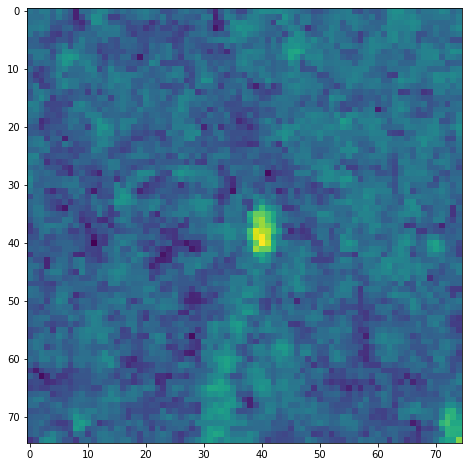

In [14]:
#2d image
plt.imshow(band1)
plt.show()

In [15]:
#plotly layout
label = 'ship'

fig = tools.make_subplots(rows=1, cols=2, specs=[[{'is_3d':True}, {'is_3d':True}]])
fig.append_trace(dict(type='surface', z=band1, colorscale='RdBu', scene='scene1', showscale=False), 1, 1)
fig.append_trace(dict(type='surface', z=band1, colorscale='RdBu', scene='scene2', showscale=False), 1, 2)

fig['layout'].update(title='3D surface plot for "{}" (left is from band1, right is from band2)'.format(label), titlefont=dict(size=30), height=800, width=1200)
py.iplot(fig)

In [16]:
def plot_contour_2d(band1, band2, label):
    fig = tools.make_subplots(rows=1, cols=2, specs=[[{'is_3d':True}, {'is_3d':True}]])
    fig.append_trace(dict(type='surface', z=band1, colorscale='RdBu', scene='scene1', showscale=False), 1, 1)
    fig.append_trace(dict(type='surface', z=band1, colorscale='RdBu', scene='scene2', showscale=False), 1, 2)

    fig['layout'].update(title='3D surface plot for "{}" (left is from band1, right is from band2)'.format(label), titlefont=dict(size=30), height=800, width=1200)
    py.iplot(fig)
    
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(X_band_1[num,:,:])
    ax[0].set_title('Image from band1')
    ax[1].imshow(X_band_2[num,:,:])
    ax[1].set_title('Image from band2')
    plt.show()

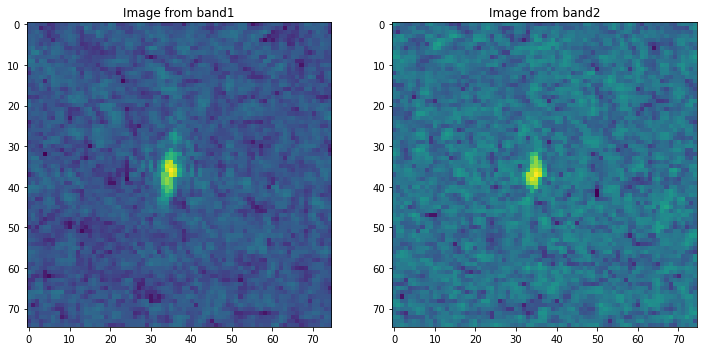

In [17]:
#ship
num = 0
label = 'iceberg' if (train['is_iceberg'].values[num] == 1) else 'ship'
plot_contour_2d(X_band_1[num,:,:], X_band_2[num,:,:], label)

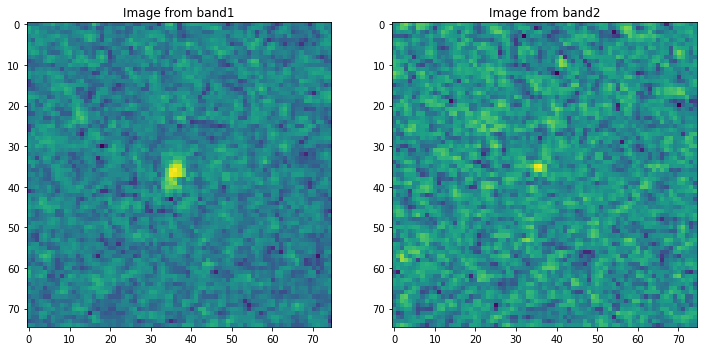

In [18]:
#iceberg
num = 2
label = 'iceberg' if (train['is_iceberg'].values[num] == 1) else 'ship'
plot_contour_2d(X_band_1[num,:,:], X_band_2[num,:,:], label)

In [19]:
#Import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

In [20]:
#define model
def getModel():
    #Building the model
    gmodel=Sequential()
    #Conv Layer1
    gmodel.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(75,75,3)))
    gmodel.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    gmodel.add(Dropout(0.2))
    
    #Conv Layer2
    gmodel.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer3
    gmodel.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    gmodel.add(Dropout(0.2))
    
    #Conv Layer4
    gmodel.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    gmodel.add(Dropout(0.2))
    
    #Faltten data
    gmodel.add(Flatten())
    
    #Dense Layer1
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))
    
    #Dense Layer2
    gmodel.add(Dense(256))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))
    
    #Sigmoid Layer
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))
    
    mypotin = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    gmodel.compile(loss='binary_crossentropy',
                  optimizer=mypotin,
                  metrics='acc')
    gmodel.summary()
    return gmodel

#valid loss check and overfitting 방지
def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience,mode='min')
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es,msave]
file_path = '.model_weights.hdf5'
callbacks = get_callbacks(filepath=file_path, patience=5)

In [21]:
Input_layer = Input(shape=(75, 75, 3))
model = Conv2D(64, kernel_size=(3,3), activation='relu')(Input_layer)
model = Model(inputs=Input_layer, outputs= model)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 73, 73, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [22]:
Input_layer = Input(shape=(75, 75, 3))
model = Conv2D(64, kernel_size=(3,3), activation='relu')(Input_layer)
mdoel = MaxPooling2D(pool_size=(3,3), strides=(2,2))(model)
model = Dropout(0.2)(model)
model = Model(inputs=Input_layer, outputs= model)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Random Seed
import tensorflow as tf

SEED=1989
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [24]:
X_train.shape

(1604, 75, 75, 3)

In [25]:
taget_train = train['is_iceberg']
X_train, X_val, Y_train, Y_val = train_test_split(X_train, taget_train, random_state=SEED, train_size=0.8)

gmodel=getModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       1

In [26]:
#Model Fit
gmodel.fit(X_train, Y_train,
          batch_size=24,
          epochs=10,
          verbose=2,
          validation_data=(X_val,Y_val),
          callbacks=callbacks)

Epoch 1/10
54/54 - 5s - loss: 1.0078 - acc: 0.5269 - val_loss: 0.6246 - val_acc: 0.5607
Epoch 2/10
54/54 - 0s - loss: 0.5765 - acc: 0.6438 - val_loss: 0.5363 - val_acc: 0.6822
Epoch 3/10
54/54 - 0s - loss: 0.5289 - acc: 0.7069 - val_loss: 0.4347 - val_acc: 0.8349
Epoch 4/10
54/54 - 0s - loss: 0.4999 - acc: 0.7443 - val_loss: 0.4588 - val_acc: 0.7726
Epoch 5/10
54/54 - 0s - loss: 0.4601 - acc: 0.7818 - val_loss: 0.4020 - val_acc: 0.8318
Epoch 6/10
54/54 - 0s - loss: 0.4555 - acc: 0.7677 - val_loss: 0.4197 - val_acc: 0.8006
Epoch 7/10
54/54 - 0s - loss: 0.4382 - acc: 0.7919 - val_loss: 0.4242 - val_acc: 0.7882
Epoch 8/10
54/54 - 0s - loss: 0.4351 - acc: 0.7911 - val_loss: 0.4067 - val_acc: 0.8037
Epoch 9/10
54/54 - 0s - loss: 0.4400 - acc: 0.7981 - val_loss: 0.3420 - val_acc: 0.8505
Epoch 10/10
54/54 - 0s - loss: 0.4295 - acc: 0.8005 - val_loss: 0.3558 - val_acc: 0.8505


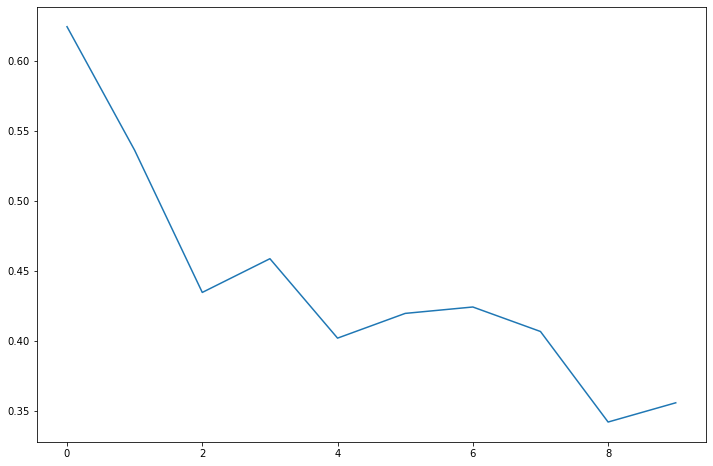

In [27]:
hist=gmodel.history
plt.plot(hist.history['val_loss'])

In [28]:
gmodel.load_weights(filepath=file_path)
score = gmodel.evaluate(X_val, Y_val, verbose=1)
print('Test loss:', score[0])
print('Test acc:', score[1])

11/11 [==============================] - 0s 7ms/step - loss: 0.3420 - acc: 0.8505
Test loss: 0.34200355410575867
Test acc: 0.8504672646522522


In [29]:
predicted_test = gmodel.predict_proba(X_test)#확률값

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning:

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.



In [30]:
predicted_test.shape

(8424, 1)

In [31]:
submission = pd.DataFrame()
submission['id'] = test['id']
#submission['is_iceberg'] = predicted_test.reshape((predicted_test.shape[0]))
submission['is_iceberg'] = predicted_test.flatten()
submission.to_csv('sub.csv', index=False)

In [32]:
submission

,id,is_iceberg
0,5941774d,9.097500e-01
1,4023181e,7.921090e-01
2,b20200e4,1.924213e-04
3,e7f018bb,8.426505e-01
4,4371c8c3,7.606247e-01
...,...,...
8419,16ee9b50,2.750183e-11
8420,5a599eb7,5.344832e-01
8421,df30d6dd,2.830023e-01
8422,18af95b1,9.651621e-01
